# GCP charts,
we want to make pie charts with user data from GCP logs. first section is legacy version from unfiltered file. More reliable data is 2nd section on .end file.


In [1]:
# import  epmt query 
print('importing epmt_query')
import epmt_query as eq
# import matplot for better plotting functions
import sys
sys.path.insert(0,'/home/Ian.Laflotte/ians_py374/pip_experiment')
import matplotlib.pyplot as plt
plt.style.use('default')
import numpy as np
# import pandas. optional but helpful 'display.max_columns' arg shows all DataFrame columns when printing
print('importing pandas')
import pandas
pandas.set_option('display.max_columns', None)
import copy

importing epmt_query
importing pandas


In [2]:
filename = '20240325'
f = open(filename)   
newlist = [i for i in f]
print('There are ', len(newlist),' environment log entries from ', filename)

There are  5089659  environment log entries from  20240325


In [3]:
#get an idea of what kind of nodes exist
nodes = []
for aa in range(len(newlist)):
    node_index = newlist[aa].find('node')
    if node_index>0:
        nodes.append(newlist[aa][node_index+5:node_index+10])
print(set(nodes))
            

{'dtn78', 'dtn68', 'pp301', 'pp308', 'pp335', 'pp038', 'pp211', 'dtn63', 'pp201', 'pp302', 'ldt-4', 'pp323', 'pp333', 'pp029', 'pp045', 'an204', 'pp212', 'pp312', 'dtn66', 'dtn50', 'an006', 'pp207', 'c5n20', 'pp042', 'dtn52', 'c5n05', 'pp040', 'pp334', 'c5n13', 'pp041', 'c5n15', 'an009', 'pp300', 'pp331', 'dtn73', 'dtn70', 'pp322', 'gaea5', 'pp027', 'dtn51', 'pp310', 'dtn57', 'pp035', 'pp328', 'pp039', 'pp330', 'an203', 'dtn53', 'pp316', 'pp311', 'pp318', 'pp304', 'pp317', 'pp313', 'pp009', 'pp332', 'pp049', 'dtn74', 'an104', 'dtn59', 'pp205', 'dtn64', 'pp046', 'pp336', 'pp303', 'pp206', 'pp315', 'pp203', 'pp210', 'pp044', 'pp338', 'dtn60', 'pp307', 'login', 'pp028', 'c5n00', 'pp327', 'pp337', 'dtn77', 'dtn65', 'pp031', 'dtn75', 'dtn55', 'an205', 'dtn56', 'pp037', 'dtn54', 'c5n02', 'pp043', 'pp036', 'an014', 'pp305', 'pp306', 'c5n18', 'c5n07', 'dtn76', 'dtn69', 'pp048', 'c5n10', 'dtn79', 'pp321', 'c5n06', 'pp008', 'an105', 'pp324', 'an010', 'pp010', 'pp030', 'an206', 'an012', 'c5n11', 

In [4]:
#sort by node group
node_groups = ['pp','dtn','an','gaea5','c5n', 'ldt-4','login']  #in order that we want it to appear on piechart
node_shorthand = ['pp','dt','an','ga','c5', 'ld','lo']
node_counts = dict(zip(node_shorthand, np.zeros(len(node_shorthand))))  #zip into a dictionary
for aa in range(len(newlist)):
    node_index = newlist[aa].find('node')
    if node_index>0:
        node_key = newlist[aa][node_index+5:node_index+7]
        node_counts[node_key] += 1
#clean out entries that we do not care about
del node_counts['ld']
del node_counts['lo']
node_counts

{'pp': 3152304.0, 'dt': 1072733.0, 'an': 319692.0, 'ga': 127277.0, 'c5': 725.0}

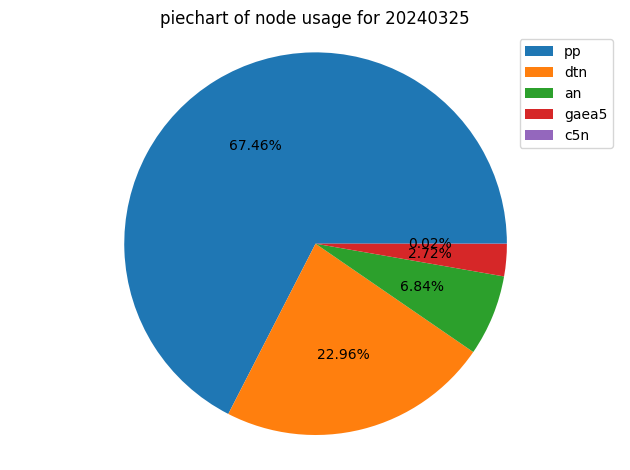

In [6]:
# Data to plot
labels = []
sizes = []
for x, y in node_counts.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.style.use('default')
plt.pie(sizes, autopct='%1.2f%%')

plt.axis('equal')
plt.title('piechart of node usage for ' + filename)
plt.legend(labels=node_groups)
plt.tight_layout()
plt.show()

## feature identification
We can use the bellow cell to easily search for keywords, get examples, and see the frequency of appearence.

In [7]:
# use this cell to search for examples
search_parameter = 'size'
counter = 0
for log in newlist:
    if log.find(search_parameter) >= 0:
        counter += 1
        if counter < 4:
            print(log)
print('THE TOTAL NUMBER OF LOGS YOUR PARAMETER ',search_parameter,' APPEARS IN IS ',counter,', OUT OF ',len(newlist),' TOTAL LOGS.',100*counter/len(newlist),'%')

Mar 25 00:50:59 192.188.179.104 gcp_debug[25287]: node=dtn60.head.cm.c5.ncrc.gov;ts=2024-03-25T00:50:59.786+0000;guid=fdb48b5d-398c-408c-af6d-8ebdf8dabe51;p=DEBUG;where=GCP::Agent::stat.205;where=local;path=/gpfs/f5/gfdl_w/scratch/Matthew.Morin/NGGPS/staged/SHiELD_rt2022/20240324.18Z.C768.RT2022_cpsd_GFSv16/ascii_out.tgz;mode=33188;uid=6206;gid=500;size=509946;mtime_epoch=1711327856;type=file

Mar 25 00:50:59 192.188.179.104 gcp_debug[25287]: node=dtn60.head.cm.c5.ncrc.gov;ts=2024-03-25T00:50:59.786+0000;guid=fdb48b5d-398c-408c-af6d-8ebdf8dabe51;p=DEBUG;where=GCP::Method::prep.129;message=finish;filecount=1;transfer_size=509946;

Mar 25 00:50:59 192.188.179.104 gcp_info[25287]: node=dtn60.head.cm.c5.ncrc.gov;ts=2024-03-25T00:50:59.853+0000;guid=fdb48b5d-398c-408c-af6d-8ebdf8dabe51;p=INFO;where=GCP::Driver::prep_methods.989;file_count=1;transfer_size=509946;

THE TOTAL NUMBER OF LOGS YOUR PARAMETER  size  APPEARS IN IS  552326 , OUT OF  5089659  TOTAL LOGS. 10.851925443335201 %


## Action Analysis
We will look at what action arguments appear

In [8]:
#get an idea of what kind of actions exist
actions = []
for bb in range(len(newlist)):
    action_index = newlist[bb].find('action')
    if action_index>0:
        actions.append(newlist[bb][action_index+7:action_index+12])
print(set(actions))
            

{'quote'}


## p= logs
'p=' appears a bunch of places and may be useful. lets look.

In [11]:
# use this cell to search for examples
search_parameter = 'p='
counter = 0
for log in newlist:
    if log.find(search_parameter) >= 0:
        counter += 1
        if counter < 5:
            print(log)
print('THE TOTAL NUMBER OF LOGS YOUR PARAMETER ',search_parameter,' APPEARS IN IS ',counter,', OUT OF ',len(newlist),' TOTAL LOGS.',100*counter/len(newlist),'%')

Mar 25 00:50:58 192.188.179.104 gcp_debug[25287]: node=dtn60.head.cm.c5.ncrc.gov;ts=2024-03-25T00:50:58.581+0000;guid=fdb48b5d-398c-408c-af6d-8ebdf8dabe51;p=DEBUG;where=main::BEGIN.214;event=gov.noaa.rdhpcs.gcp.init;GLOBUS_TCP_PORT_RANGE=unset

Mar 25 00:50:58 192.188.179.104 gcp_debug[25287]: node=dtn60.head.cm.c5.ncrc.gov;ts=2024-03-25T00:50:58.667+0000;guid=fdb48b5d-398c-408c-af6d-8ebdf8dabe51;p=DEBUG;where=GCP::FileObj::smartsite.1513;message=gaea.rdtn.gaea.(?^:^(/lustre/f[12](-tds)?/|/gpfs/f5/));

Mar 25 00:50:58 192.188.179.104 gcp_debug[25287]: node=dtn60.head.cm.c5.ncrc.gov;ts=2024-03-25T00:50:58.667+0000;guid=fdb48b5d-398c-408c-af6d-8ebdf8dabe51;p=DEBUG;where=GCP::FileObj::smartsite.1518;message=selfserve filesystem found on dtn.;

Mar 25 00:50:58 192.188.179.104 gcp_info[25287]: node=dtn60.head.cm.c5.ncrc.gov;ts=2024-03-25T00:50:58.671+0000;guid=fdb48b5d-398c-408c-af6d-8ebdf8dabe51;p=INFO;where=GCP::Driver::new.296;event=gov.noaa.rdhpcs.gcp.start;SLURM_JOBID_internal=87720957

In [12]:
p_list = []
for aa in range(len(newlist)):
    index = newlist[aa].find('p=')
    if index>0:
        string1 = newlist[aa].split("p=")[1]
        string2 = string1.split(';')[0]
        p_list.append(string2)
set(p_list)

{'DEBUG', 'INFO', 'TRACE'}

Text(0, 0.5, 'counts')

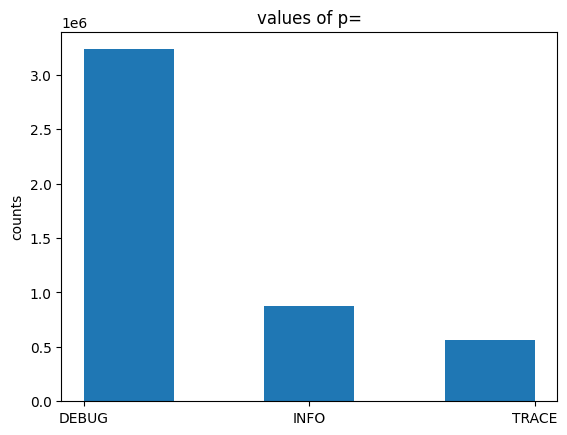

In [13]:
plt.hist(p_list, bins = 5)
plt.yscale('linear')
plt.title('values of p=')
plt.ylabel('counts')

# ends file
the ends file will have more heavily processed data, so it should be cleaner. we will print out extensive info on a number of features before deeper analysis into any of them.

Many plots appear in this section, all with similar code to look deeper at a specific feature

In [151]:
end_file_name = 'ends.20230929'
f = open(end_file_name)   
endlist = [i for i in f]
print('There are ', len(endlist),' environment log entries from ', end_file_name)

There are  713651  environment log entries from  ends.20230929


In [152]:
endlist[0]

'Sep 28 19:27:28 pp050 gcp_debug[13112]: node=pp050.princeton.rdhpcs.noaa.gov;ts=2023-09-28T19:27:28.417-0400;guid=fb662b04-505d-480c-a7b3-8c4002b21643;p=DEBUG;where=GCP::Driver::log_end.1409;event=gov.noaa.rdhpcs.gcp.end;dtn_destination=pnfs16.princeton.rdhpcs.noaa.gov;error=none;file_count=1;gcp_call=/usr/local/gcp/2.3.28/gcp \\-v FWSv\\.nc \\/archive\\/Eric\\.Stofferahn\\/FMS2023\\.01_mom6_20221203_J_c5_niki\\/esm4\\.2c_4xCO2_start500\\/gfdl\\.ncrc5\\-intel22\\-prod\\-openmp\\/pp\\/land\\/ts\\/monthly\\/5yr\\/land\\.017601\\-018012\\.FWSv\\.nc;gcp_version=2.3.28;level=info;node=pp050.princeton.rdhpcs.noaa.gov;pid=13112;prog=/usr/local/gcp/2.3.28/gcp;status=0;transfer_size=12475216;transfer_time=2;transport_count=1;user=Eric.Stofferahn;\n'

In [153]:
#find all examples of a keyword, and display set, examples and appearance rate
keyword = 'level='
test_list = []
counter = 0
for aa in range(len(endlist)):
    index = endlist[aa].find(keyword)
    if index>0:
        string1 = endlist[aa].split(keyword)[1]
        string2 = string1.split(';')[0]
        test_list.append(string2)
        counter += 1
        if counter < 4:
            print(endlist[aa])
print('THE TOTAL NUMBER OF LOGS YOUR PARAMETER ',keyword,' APPEARS IN IS ',counter,', OUT OF ',len(endlist),' TOTAL LOGS.',100*counter/len(endlist),'%')
print('the variable ',keyword,' contains possible responses: ',set(test_list))

Sep 28 19:27:28 pp050 gcp_debug[13112]: node=pp050.princeton.rdhpcs.noaa.gov;ts=2023-09-28T19:27:28.417-0400;guid=fb662b04-505d-480c-a7b3-8c4002b21643;p=DEBUG;where=GCP::Driver::log_end.1409;event=gov.noaa.rdhpcs.gcp.end;dtn_destination=pnfs16.princeton.rdhpcs.noaa.gov;error=none;file_count=1;gcp_call=/usr/local/gcp/2.3.28/gcp \-v FWSv\.nc \/archive\/Eric\.Stofferahn\/FMS2023\.01_mom6_20221203_J_c5_niki\/esm4\.2c_4xCO2_start500\/gfdl\.ncrc5\-intel22\-prod\-openmp\/pp\/land\/ts\/monthly\/5yr\/land\.017601\-018012\.FWSv\.nc;gcp_version=2.3.28;level=info;node=pp050.princeton.rdhpcs.noaa.gov;pid=13112;prog=/usr/local/gcp/2.3.28/gcp;status=0;transfer_size=12475216;transfer_time=2;transport_count=1;user=Eric.Stofferahn;

Sep 28 19:27:28 pp050 gcp_info[13112]: node=pp050.princeton.rdhpcs.noaa.gov;ts=2023-09-28T19:27:28.418-0400;guid=fb662b04-505d-480c-a7b3-8c4002b21643;p=INFO;where=GCP::Driver::log_end.1411;event=gov.noaa.rdhpcs.gcp.end;dtn_destination=pnfs16.princeton.rdhpcs.noaa.gov;error=n

In [154]:
#find all examples of a keyword, and display set, examples and appearance rate
keyword = 'file_count='
test_list = []
file_count_list = []
counter = 0
for aa in range(len(endlist)):
    index = endlist[aa].find(keyword)
    if index>0:
        string1 = endlist[aa].split(keyword)[1]
        string2 = string1.split(';')[0]
        test_list.append(string2)
        file_count_list.append(int(string2))
        counter += 1
        if counter < 1:
            print(endlist[aa])
print('THE TOTAL NUMBER OF LOGS YOUR PARAMETER ',keyword,' APPEARS IN IS ',counter,', OUT OF ',len(endlist),' TOTAL LOGS.',100*counter/len(endlist),'%')
print('the variable ',keyword,' contains possible responses: ',set(test_list))

THE TOTAL NUMBER OF LOGS YOUR PARAMETER  file_count=  APPEARS IN IS  713601 , OUT OF  713651  TOTAL LOGS. 99.99299377426782 %
the variable  file_count=  contains possible responses:  {'43', '31', '29', '7', '6', '13', '66', '16', '21', '39', '5', '57', '608', '22', '19', '34', '42', '30', '77', '12', '40', '23', '76', '33', '243', '46', '2', '172', '15', '18', '266', '0', '55', '1000', '8', '2468', '25', '248', '1', '11', '2489', '197', '24', '60', '10', '4', '226', '53', '9', '90', '265', '249', '160', '41', '3', '87', '82', '110', '116', '32', '215', '35'}


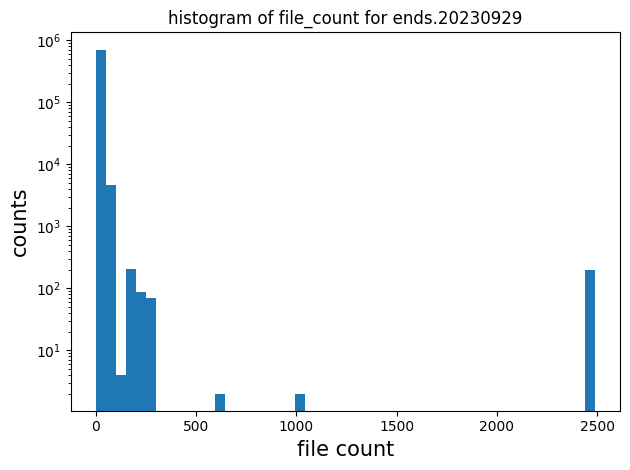

In [155]:
plt.style.use('default')
plt.hist(file_count_list, bins = 50)
plt.yscale('log')
plt.ylabel('counts', fontsize = 15)
plt.xlabel('file count', fontsize = 15)
plt.title('histogram of file_count for '+ end_file_name)
plt.tight_layout()
plt.savefig('env_log_plots/file_counts.pdf', format = 'pdf', bbox_inches='tight')

In [157]:
#find all examples of a keyword, and display set, examples and appearance rate
keyword = 'transfer_size='
test_list = []
transfer_list = []
counter = 0
for aa in range(len(endlist)):
    index = endlist[aa].find(keyword)
    if index>0:
        string1 = endlist[aa].split(keyword)[1]
        string2 = string1.split(';')[0]
        test_list.append(string2)
        transfer_list.append(int(string2))
        counter += 1
        if counter < 1:
            print(endlist[aa])
print('THE TOTAL NUMBER OF LOGS YOUR PARAMETER ',keyword,' APPEARS IN IS ',counter,', OUT OF ',len(endlist),' TOTAL LOGS.',100*counter/len(endlist),'%')
#print('the variable ',keyword,' contains possible responses: ',set(test_list))

THE TOTAL NUMBER OF LOGS YOUR PARAMETER  transfer_size=  APPEARS IN IS  713600 , OUT OF  713651  TOTAL LOGS. 99.99285364975317 %


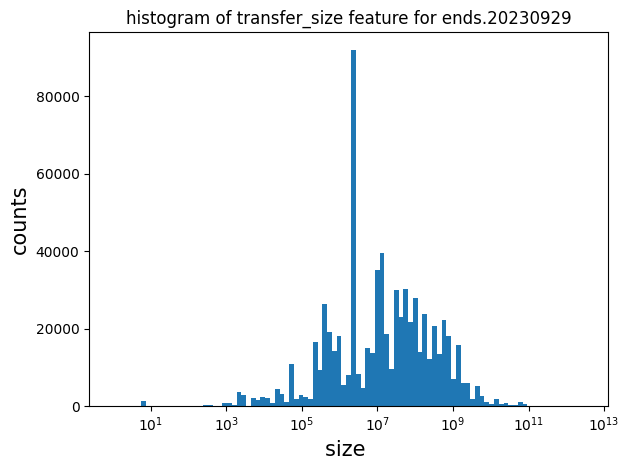

In [158]:
bins = 100
plt.hist(transfer_list, bins = np.logspace(0,np.log10(max(transfer_list)),bins))
plt.xscale('log')
plt.yscale('linear')
plt.ylabel('counts', fontsize = 15)
plt.xlabel('size ', fontsize = 15)
plt.title('histogram of transfer_size feature for ' + end_file_name)
plt.tight_layout()
plt.savefig('env_log_plots/transfer_size.pdf', format = 'pdf', bbox_inches='tight')

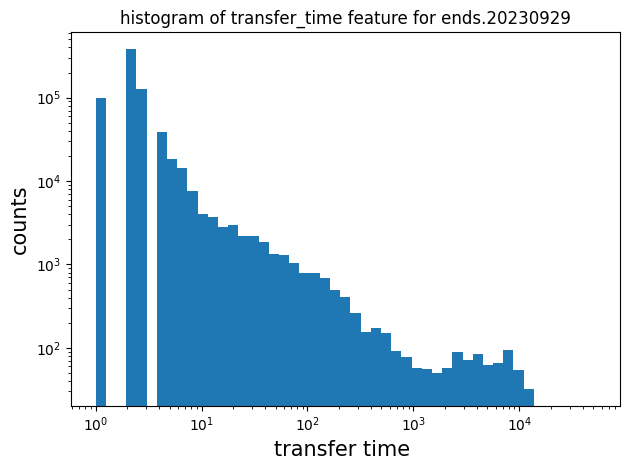

In [159]:
#find all examples of a keyword, and display set, examples and appearance rate
keyword = 'transfer_time='
transfer_time = []
counter = 0
for aa in range(len(endlist)):
    index = endlist[aa].find(keyword)
    if index>0:
        string1 = endlist[aa].split(keyword)[1]
        string2 = string1.split(';')[0]
        transfer_time.append(int(string2))

bins = 50
plt.hist(transfer_time, bins = np.logspace(0,np.log10(max(transfer_time)),bins))
plt.xscale('log')
plt.yscale('log')
plt.ylabel('counts', fontsize = 15)
plt.xlabel('transfer time ', fontsize = 15)
plt.title('histogram of transfer_time feature for ' + end_file_name)
plt.tight_layout()
plt.savefig('env_log_plots/transfer_time.pdf', format = 'pdf', bbox_inches='tight')

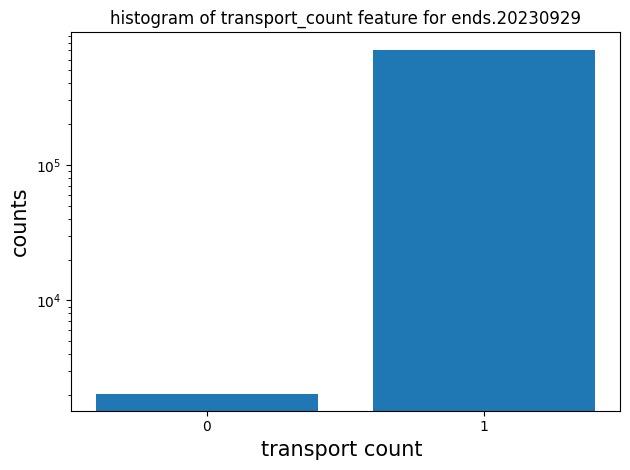

In [160]:
#find all examples of a keyword, and display set, examples and appearance rate
keyword = 'transport_count='
transport_count = []
counter = 0
for aa in range(len(endlist)):
    index = endlist[aa].find(keyword)
    if index>0:
        string1 = endlist[aa].split(keyword)[1]
        string2 = string1.split(';')[0]
        transport_count.append(int(string2))

plt.bar( ['0','1'], height = (len(transport_count)-sum(transport_count),sum(transport_count)))
plt.xscale('linear')
plt.yscale('log')
plt.ylabel('counts', fontsize = 15)
plt.xlabel('transport count ', fontsize = 15)
plt.xticks([0,1])
plt.title('histogram of transport_count feature for ' + end_file_name)
plt.tight_layout()
plt.savefig('env_log_plots/transport_count.pdf', format = 'pdf', bbox_inches='tight')

In [162]:
#sort by node group
node_groups = ['pp','dtn','gaea5','an','c5n', 'ldt-4','login', 'nid']
node_shorthand = ['pp','dt','ga','an','c5', 'ld','lo','ni']
node_counts = dict(zip(node_shorthand, np.zeros(len(node_shorthand))))
for aa in range(len(endlist)):
    node_index = endlist[aa].find('node')
    if node_index>0:
        node_key = endlist[aa][node_index+5:node_index+7]
        node_counts[node_key] += 1
#clean out entries that we do not care about
print(node_counts)
del node_counts['ld']
del node_counts['lo']
del node_counts['ni']
del node_counts['c5']
node_counts

{'pp': 643821.0, 'dt': 50454.0, 'ga': 17923.0, 'an': 1149.0, 'c5': 234.0, 'ld': 0.0, 'lo': 0.0, 'ni': 70.0}


{'pp': 643821.0, 'dt': 50454.0, 'ga': 17923.0, 'an': 1149.0}

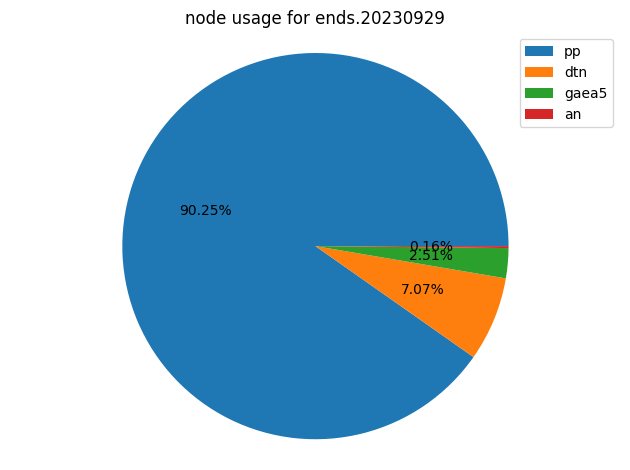

In [163]:
# Data to plot
labels = []
sizes = []
for x, y in node_counts.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.style.use('default')
plt.pie(sizes, autopct='%1.2f%%')

plt.axis('equal')
plt.title('node usage for ' + end_file_name)
plt.legend(labels=node_groups)
plt.tight_layout()
plt.savefig('env_log_plots/node_usage.pdf', format = 'pdf', bbox_inches='tight')

In [164]:
#sort by node group
keyword = 'user='
users = []
#make keys of all user names
for ii in range(len(endlist)):
    node_index = endlist[ii].find('user')
    if node_index>0:
        string1 = endlist[ii].split(keyword)[1]
        string2 = string1.split(';')[0]
        users.append(string2)
users = set(users)
user_counts = dict(zip(users, np.zeros(len(users))))
        
#calculate appearance numbers of each user
for aa in range(len(endlist)):
    node_index = endlist[aa].find('user')
    if node_index>0:
        string1 = endlist[aa].split(keyword)[1]
        string2 = string1.split(';')[0]
        user_counts[string2] += 1
#clean out entries that we do not care about

user_counts

{'Cameron.Macdonald': 1240.0,
 'Matthew.Morin': 4751.0,
 'Charles.Stock': 6.0,
 'Bosong.Zhang': 36382.0,
 'Benjamin.O.Johnson': 49730.0,
 'Alex.Kaltenbaugh': 2050.0,
 'Hae-Cheol.Kim': 13.0,
 'Brandon.Reichl': 1020.0,
 'Niki.Zadeh': 372.0,
 'Larry.Horowitz': 173.0,
 'Raphael.Dussin': 22036.0,
 'Wenhao.Dong': 132.0,
 'William.Cooke': 57115.0,
 'Meiyun.Lin': 2.0,
 'Mitchell.Bushuk': 526.0,
 'Baoqiang.Xiang': 6.0,
 'Lucas.Harris': 33082.0,
 'Justin.Perket': 7.0,
 'Noemi.Vergopolan': 13326.0,
 'Tim.Yeager': 12.0,
 'Colleen.McHugh': 586.0,
 'Huan.Guo': 1014.0,
 'Fabien.Paulot': 144234.0,
 'Glen.Chua': 6744.0,
 'Linjiong.Zhou': 4131.0,
 'Mingjing.Tong': 33.0,
 'Enrico.Zorzetto': 10916.0,
 'Matthew.Harrison': 862.0,
 'Minjin.Lee': 840.0,
 'Nathaniel.Johnson': 4.0,
 'Lori.Sentman': 128741.0,
 'Zhihong.Tan': 85785.0,
 'Tom.Delworth': 156.0,
 'Yujia.You': 451.0,
 'Oar.Gfdl.Esd': 2866.0,
 'John.Krasting': 3402.0,
 'Liz.Drenkard': 414.0,
 'William.Gregory': 732.0,
 'Kun.Gao': 6.0,
 'Jonathan.Smith'

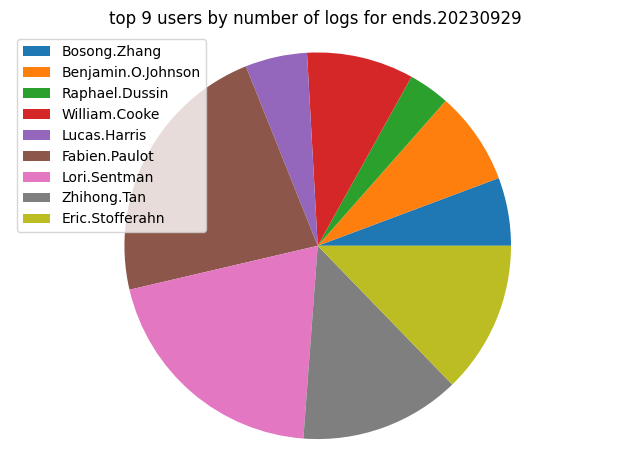

In [165]:
# Data to plot
num_users = 9   #number of users that appears in chart
labels = []
sizes = []
for x, y in user_counts.items():
    labels.append(x)
    sizes.append(y)
# larger lists, going to cut out all but top 5
sorted_sizes = copy.copy(sizes)
sorted_sizes.sort()
top_sizes = []
top_labels = []
for bb in range(len(sizes)):
    if sizes[bb] >= sorted_sizes[-1*num_users]:
        top_sizes.append(sizes[bb])
        top_labels.append(labels[bb])

# Plot
plt.style.use('default')
plt.pie(top_sizes)

plt.axis('equal')
plt.title('top ' +str(num_users)+' users by number of logs for ' + end_file_name)
plt.legend(labels=top_labels)
plt.tight_layout()
plt.savefig('env_log_plots/top_users.pdf', format = 'pdf', bbox_inches='tight')